In [20]:
# Importing packages

import pandas as pd
import numpy as np
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from seaborn import set_style
from sklearn.ensemble import RandomForestRegressor 
set_style("whitegrid")


In [21]:
# Loading data

df = pd.read_csv('Data/df.csv')

In [22]:
df.head()

,STATE,COUNTY,FIPS,EP_POV150,EP_UNEMP,EP_HBURD,EP_NOHSDP,EP_UNINSUR,EP_AGE65,EP_MINRTY,SPL_THEME1,SPL_THEME2,SPL_THEME3,Heart_dis_val,kidney_dis_val,diab_dis_val,obes_dis_val,death_per100K
0,Alabama,Autauga,1001,22.9,2.9,23.3,11.3,8.0,15.3,26.0,2.1725,2.8301,0.6337,6.700000,3.033333,11.666667,38.750000,420.626824
1,Alabama,Baldwin,1003,16.9,3.9,23.0,9.5,9.5,20.5,17.1,1.9853,2.1150,0.5022,7.412903,3.103226,11.893548,33.419355,327.459079
2,Alabama,Barbour,1005,40.6,6.9,24.7,25.3,10.7,19.1,54.7,4.1100,3.3229,0.8962,9.244444,4.377778,17.377778,46.133333,421.291420
3,Alabama,Bibb,1007,27.6,7.4,21.8,19.1,9.1,16.4,25.6,3.4261,2.5380,0.6292,7.375000,3.225000,12.600000,38.650000,495.668483
4,Alabama,Blount,1009,23.8,5.2,19.1,17.2,10.0,18.0,13.3,2.7455,2.8094,0.4147,7.866667,3.222222,12.244444,32.888889,451.354062


In [23]:
# Feature set

X = df.drop(['STATE','COUNTY','FIPS','death_per100K'], axis=1)
X.head()

,EP_POV150,EP_UNEMP,EP_HBURD,EP_NOHSDP,EP_UNINSUR,EP_AGE65,EP_MINRTY,SPL_THEME1,SPL_THEME2,SPL_THEME3,Heart_dis_val,kidney_dis_val,diab_dis_val,obes_dis_val
0,22.9,2.9,23.3,11.3,8.0,15.3,26.0,2.1725,2.8301,0.6337,6.700000,3.033333,11.666667,38.750000
1,16.9,3.9,23.0,9.5,9.5,20.5,17.1,1.9853,2.1150,0.5022,7.412903,3.103226,11.893548,33.419355
2,40.6,6.9,24.7,25.3,10.7,19.1,54.7,4.1100,3.3229,0.8962,9.244444,4.377778,17.377778,46.133333
3,27.6,7.4,21.8,19.1,9.1,16.4,25.6,3.4261,2.5380,0.6292,7.375000,3.225000,12.600000,38.650000
4,23.8,5.2,19.1,17.2,10.0,18.0,13.3,2.7455,2.8094,0.4147,7.866667,3.222222,12.244444,32.888889


In [24]:
# Target variable

y = df['death_per100K']

y.head()

0    420.626824
1    327.459079
2    421.291420
3    495.668483
4    451.354062
Name: death_per100K, dtype: float64

### Train test split

In [25]:
# Train test split 80-20 split

X_train, X_test, y_train, y_test = train_test_split(X.copy(),y.copy(),
                                                       shuffle=True,
                                                       random_state=153,
                                                       test_size=.2)

#### Standardize the magnitude of numeric features using a scaler

In [26]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:

# X_train_scaled = X_train.values
# X_test_scaled = X_test

In [28]:
X_train_scaled.shape

(2466, 14)

#### Cross-Validation setup

In [29]:
kfold = KFold(n_splits = 5,
              shuffle = True,
              random_state = 582)

#### Model 1 - Linear regression

In [30]:
## make an array of zeros that will hold our rmses
mses = np.zeros(5)
rsq = np.zeros(5)

## This keeps track of what split we are on
i = 0

for train_index, test_index in kfold.split(X_train_scaled):

    X_train_train = X_train_scaled[train_index]
    
    y_train_train = y_train.iloc[train_index]
    
    ### Holdout set
    X_train_test = X_train_scaled[test_index]
    
    y_train_test = y_train.iloc[test_index]
    
  
    
    ### This is Model 1 ###

    ## Define the LinearRegression object
    model = LinearRegression(copy_X = True)
    
    ## fit the model

    model.fit(X_train_train,
                  y_train_train.values)
    
    ## get the prediction on holdout set
    pred = model.predict(X_train_test)
    
   
    
    ### Recording the MSES ###

    mses[i] = mean_squared_error(y_train_test.values, pred)
    rsq[i] = r2_score(pred,y_train_test.values)
    
    
    ## increase i by 1
    i = i + 1

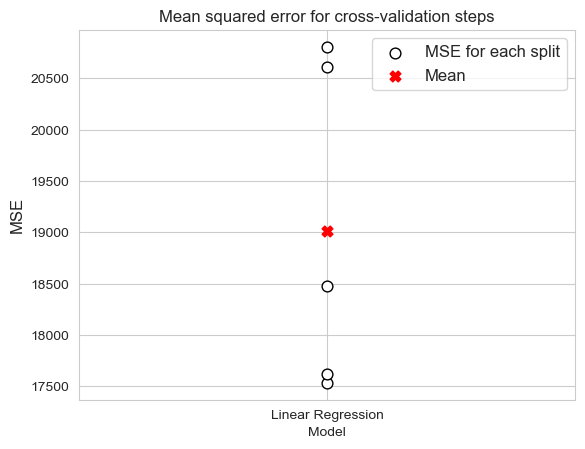

In [31]:
plt.scatter(np.zeros(5), 
            mses, 
            s=60, 
            c='white',
            edgecolor='black',
            label="MSE for each split")

plt.scatter([0], 
            np.mean(mses), 
            s=60, 
            c='r',
            marker='X',
            label="Mean")

plt.legend(fontsize=12)

plt.xticks([0],[ "Linear Regression"], fontsize=10)
plt.yticks(fontsize=10)

plt.xlabel("Model", fontsize=10)
plt.ylabel("MSE", fontsize=12)
plt.title('Mean squared error for cross-validation steps')
plt.show()

In [33]:
print("The smallest MSE is:", min(mses))

The smallest MSE is: 17534.362358796752


#### Model 2: XGBoost

##### Let's do hyperparameter tuning to find best parameters

In [81]:
# Create a Pipeline
xgb_pipeline = Pipeline([("xgb_model",xgb.XGBRegressor())])

In [82]:
# Parameters dictionary

gbm_param_grid = {'xgb_model__subsample': np.arange(.05, 1, .05),'xgb_model__max_depth': np.arange(3,14,1),'xgb_model__colsample_bytree': np.arange(.1,1.05,.05), 'xgb_model__eta': [0.3,0.2,0.1,0.01] }


In [83]:
# GridsearchCV

gridcv_mse = GridSearchCV(estimator=xgb_pipeline,param_grid=gbm_param_grid,scoring='neg_mean_squared_error', cv=5)

In [84]:
gridcv_mse.fit(X_train_scaled,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('xgb_model',
                                        XGBRegressor(base_score=None,
                                                     booster=None,
                                                     callbacks=None,
                                                     colsample_bylevel=None,
                                                     colsample_bynode=None,
                                                     colsample_bytree=None,
                                                     device=None,
                                                     early_stopping_rounds=None,
                                                     enable_categorical=False,
                                                     eval_metric=None,
                                                     feature_types=None,
                                                     gamma=None,
                                                     grow_policy=None,
                                                     importance_type=None,
                                                     interaction_constrai...
             param_grid={'xgb_model__colsample_bytree': array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
       0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
                         'xgb_model__eta': [0.3, 0.2, 0.1, 0.01],
                         'xgb_model__max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
                         'xgb_model__subsample': array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])},
             scoring='neg_mean_squared_error')

In [85]:
print("Best mse: ", np.sqrt(np.abs(gridcv_mse.best_score_)))
print("Best model: ", gridcv_mse.best_estimator_)

Best mse:  135.35948312847808
Best model:  Pipeline(steps=[('xgb_model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=0.6000000000000002, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eta=0.1,
                              eval_metric=None, feature_types=None, gamma=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=3, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy

#### RandomForest Regressor

In [35]:
# Create a Pipeline
rf_pipeline = Pipeline([("rf_model",RandomForestRegressor())])

In [36]:
# Parameters dictionary

gbm_param_grid = {'rf_model__max_depth': np.arange(3,14,1),'rf_model__max_features': ['sqrt','log2',1.0], 'rf_model__n_estimators': [100,200,300,400,500] }


In [37]:
# GridsearchCV

gridcv_mse = GridSearchCV(estimator=rf_pipeline,param_grid=gbm_param_grid,scoring='neg_mean_squared_error', cv=5)

gridcv_mse.fit(X_train_scaled,y_train)

In [24]:
print("Best mse: ", np.sqrt(np.abs(gridcv_mse.best_score_)))
print("Best model: ", gridcv_mse.best_estimator_)

Best mse:  134.15479718233829
Best model:  Pipeline(steps=[('rf_model',
                 RandomForestRegressor(max_depth=13, max_features='log2',
                                       n_estimators=300))])


#### Random Forest seems to be the best model

In [38]:
rf_model = RandomForestRegressor(max_depth=13, max_features='log2',n_estimators=300)

In [39]:
rf_model.fit(X_train_scaled,y_train)

RandomForestRegressor(max_depth=13, max_features='log2', n_estimators=300)

In [40]:
preds = rf_model.predict(X_test_scaled)

In [41]:
print("The mean squared error is:",mean_squared_error(y_test, preds))

The mean squared error is: 17738.95921353887


In [43]:
y_test2 = list(y_test)

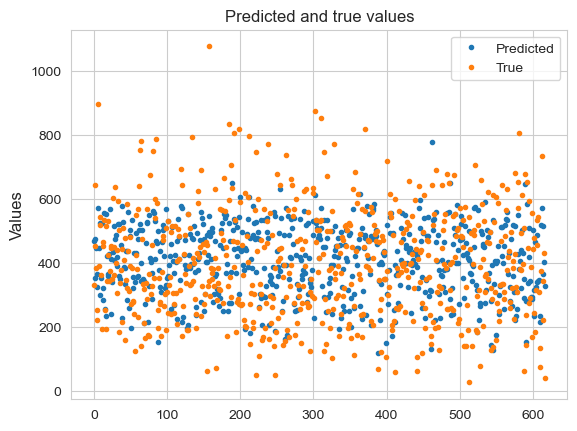

In [44]:
plt.plot(preds,marker ='.',linestyle='None')
plt.plot(y_test2,marker ='.',linestyle='None')
plt.title('Predicted and true values')
plt.ylabel('Values', fontsize=12)
plt.legend(['Predicted', 'True'])